# Learning Git - Chapter 2
*Andreas Møgelmose, anmo@create.aau.dk, 2020*

This is a tutorial which teaches you the basics of Git. This is chapter 2, so be sure you have gone through [chapter 1](LearningGit-Chapter1.ipynb) before you start this one.

Note that all the command samples in this chapter assume you have run the commands in chapter 1. They won't work if you have not created a repo yet (see [chapter 1](LearningGit-Chapter1.ipynb) for the details about that).

## Contents of this tutorial
This tutorial is split into 3 chapters with one notebook file per chapter. Here's the lowdown:

1. [Git basics](./LearningGit-Chapter1.ipynb)
2. **Git with a server (and friends!)** (this chapter)
3. [Advanced Git'ing - branching and pointers to more advanced topics](./LearningGit-Chapter3.ipynb)

### Housekeeping
Just making sure that this chapter works with the repo we created in chapter 1:

In [26]:
$pwd = pwd; While ($pwd.ToString().Trim() -match 'aNewProject$') {cd ..; $pwd = pwd}
cd aNewProject

# Git with a server (and friends!)
So far, so good. We now know how to save new changes to our local Git repository. But for Git to shine, we really need somewhere to share our changes with collaborators. This is where Github, Gitlab, or Bitbucket come in. For the purposes of this tutorial, I will be using Bitbucket, as they provide free academic accounts if you log in with your university e-mail. With that said, all three services work well, and the process is quite similar for all of them.

## Creating a repository
After you have created an account and logged in, you need to create a new repository:
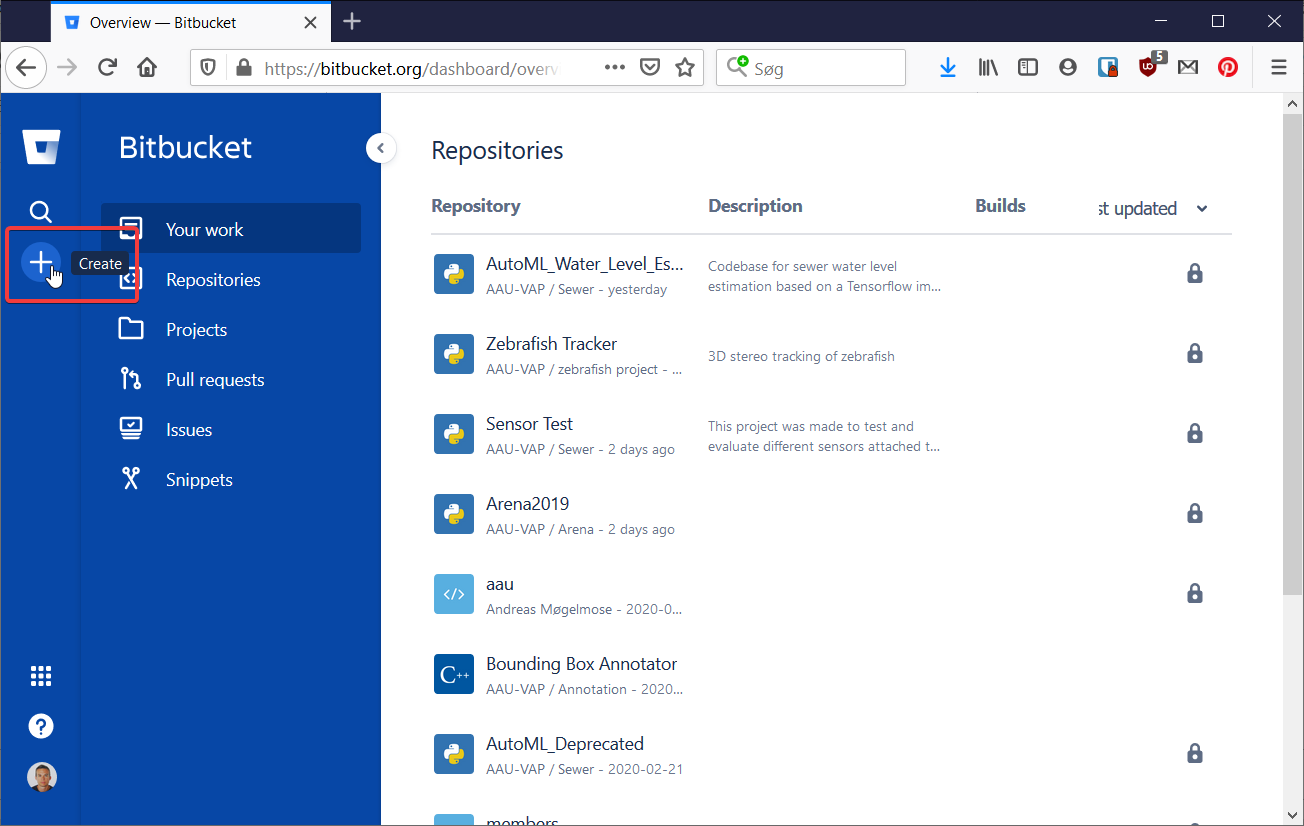

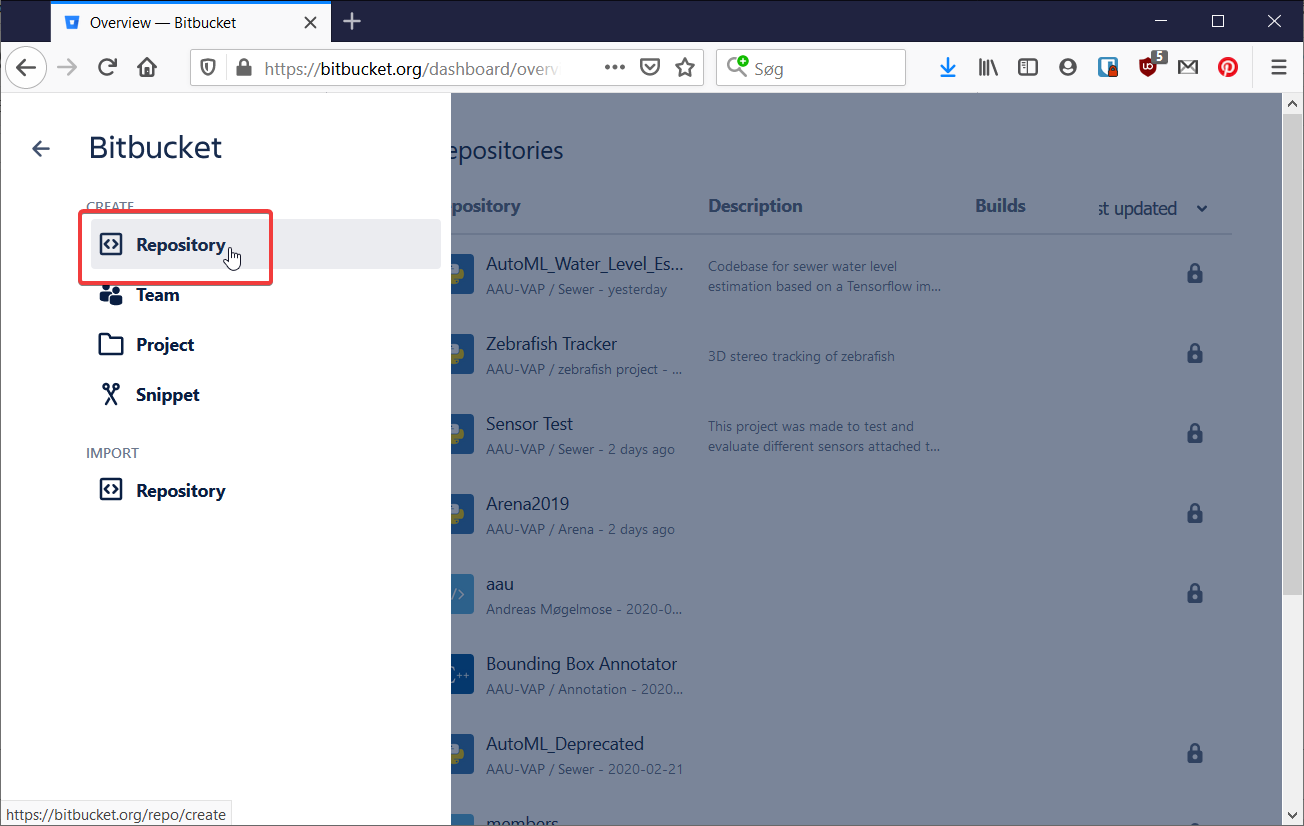

Now you simply choose a name for your repository and select whether it should be private or public. Public repositories are visible to anybody, so if you choose that, be sure you want all your code to be freely available.
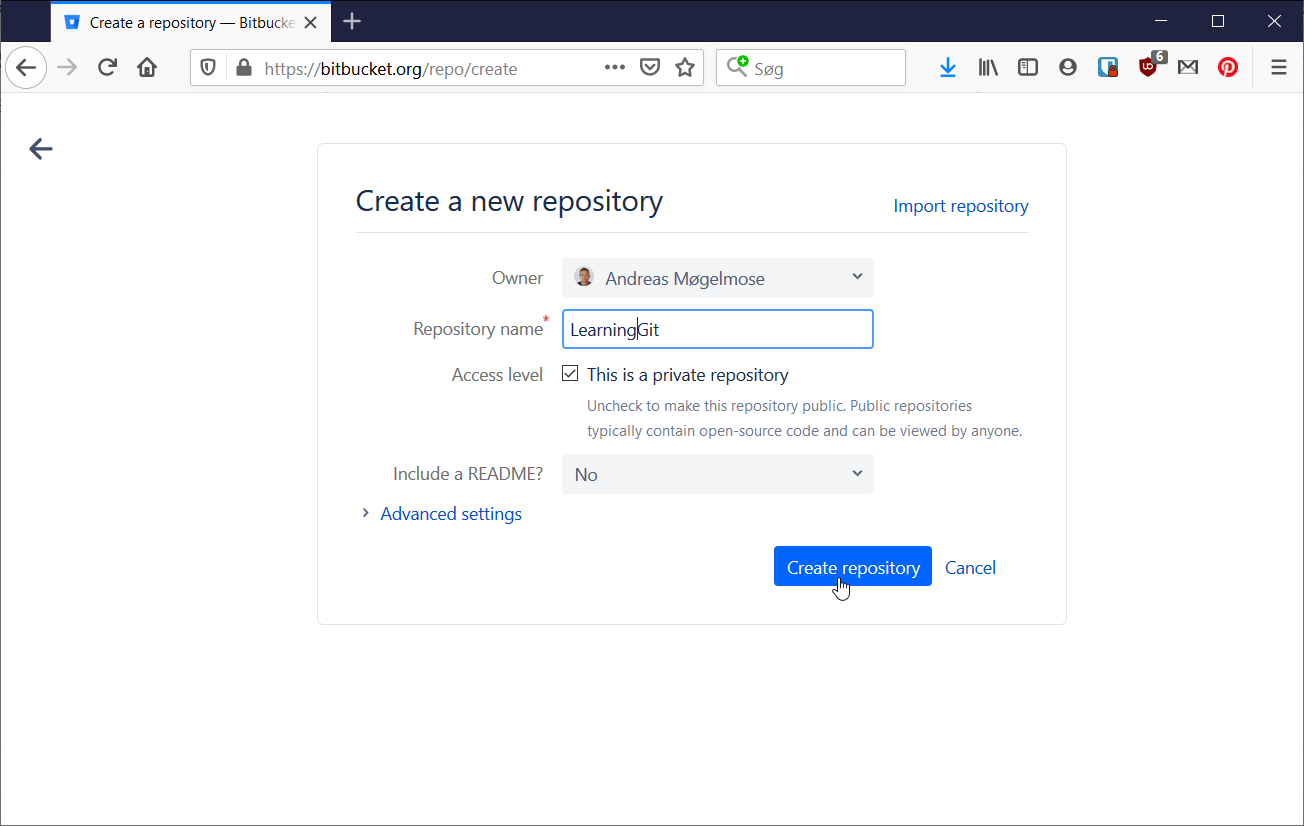

That was easy! Now we just need to connect our local repository with the new remote repository. Bitbucket is nice enough to tell us how:
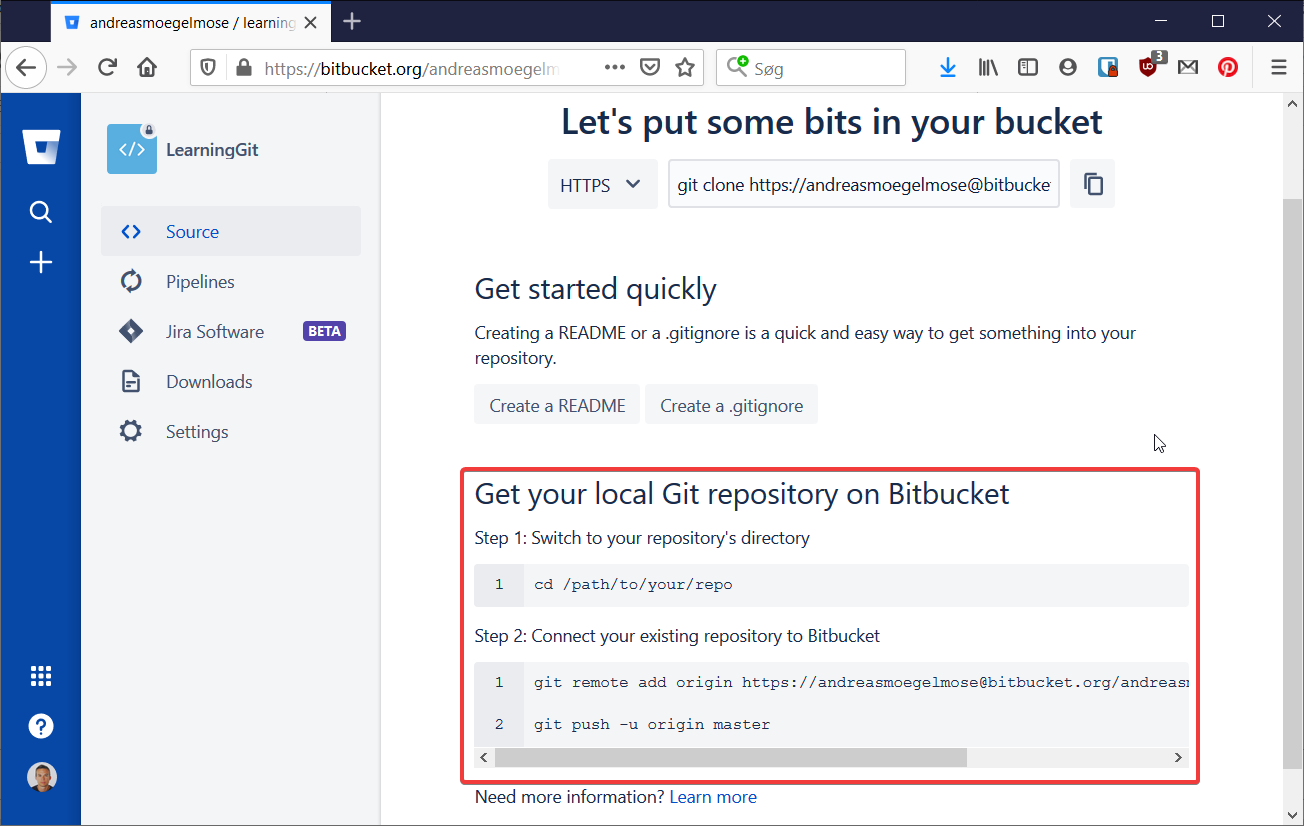

So let's do it! (if you're following along at home, make sure to change the URL below to the one from your user account)

In [15]:
git remote add origin https://andreasmoegelmose@bitbucket.org/andreasmoegelmose/learninggitdemo.git

Let us verify that worked (normally I would not bother with this, but for the purposes of this demonstration, we will):

In [16]:
git remote -v

origin	https://andreasmoegelmose@bitbucket.org/andreasmoegelmose/learninggit.git (fetch)
origin	https://andreasmoegelmose@bitbucket.org/andreasmoegelmose/learninggit.git (push)


Yes, that looks right. We have a place to get new changes from (fetch) and a place to send our changes to (push).

Now we can send our data to Bitbucket - or whatever service we have chosen to use. Every command from now on can be used no matter the service. We send changes to the server using `git push`. This will push all of our changes to the server. The first time we do it, we have to tell git that we should send our `master` branch (our main place to hold changes - we'll get back to exactly what master means) to `origin` - as you can see above, our server has been named origin automatically. It could have any name, but origin is almost always used. Here we go:

In [17]:
git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
To https://bitbucket.org/andreasmoegelmose/learninggit.git
 * [new branch]      master -> master


Git will ask for your Bitbucket password every time you push or pull (fetch). That gets annoying *fast*.

Also, it breaks this notebook.

Fortunately, StackOverflow can [help you fix that](https://stackoverflow.com/a/35942890/53345). If the command above hangs forever, follow the instructions in that link in a separate terminal. Be sure that terminal's working directory is the aNewProject-directory we created earlier. Then try closing and re-running the notebook.

And now, magically, all of our data is online:
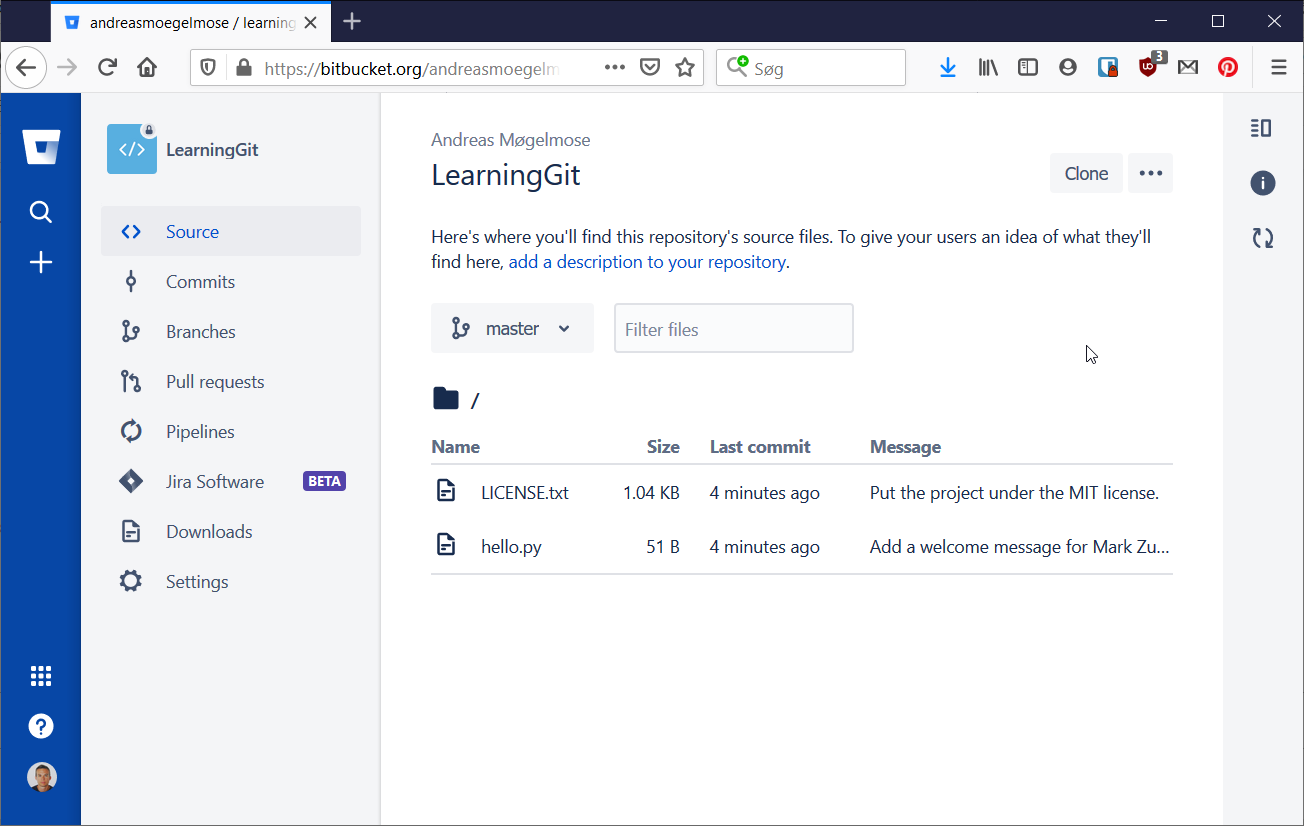

To get your group mates in on the action, you can now share your repo with them (be sure to give them write-access unless you want to build your entire project yourself...!):
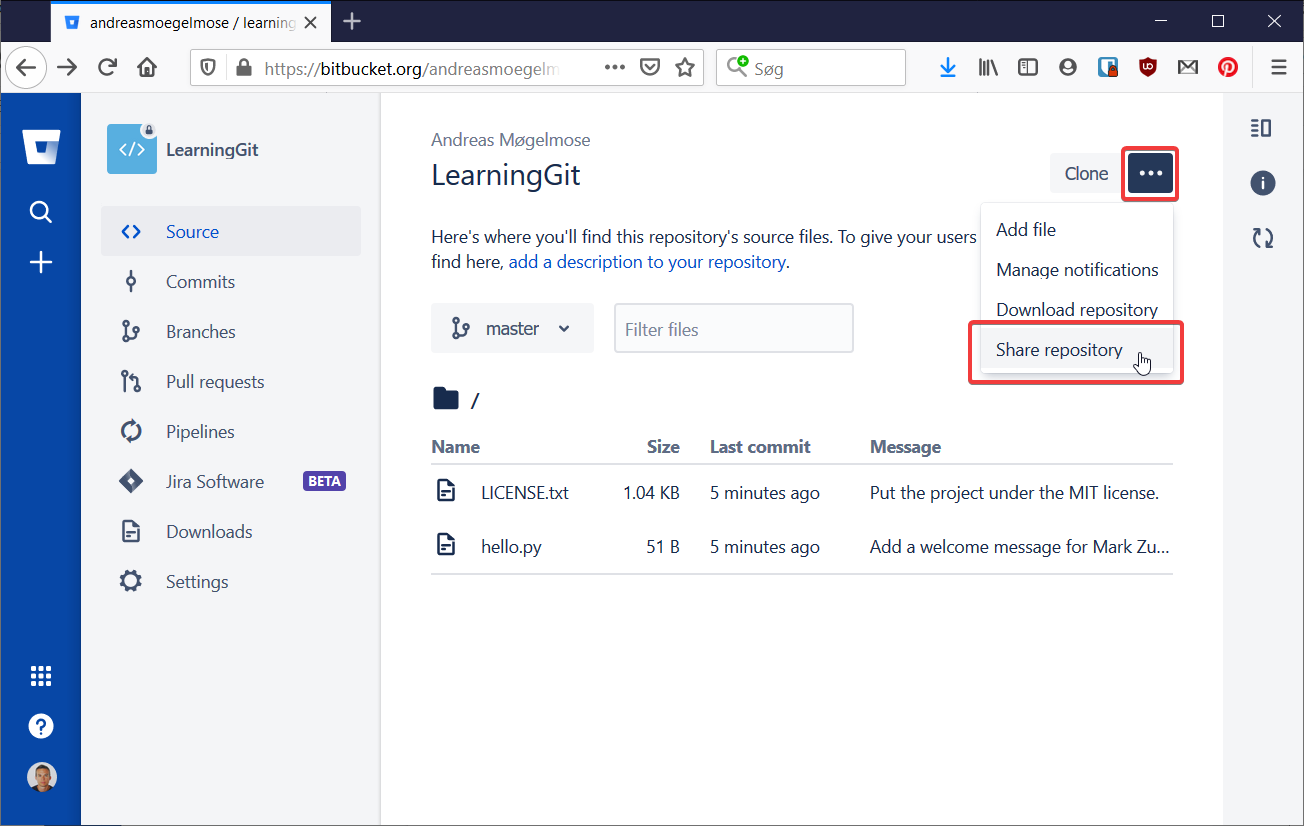

## Accessing exising repositories
Very often you won't need to create a new repository on Bitbucket because one of your group-mates did it already. In that case, you simply *clone* the repo. This is even easier. You don't even need to run the `git init` command we started out with. You simply need the address of the repo and then run `git clone`, like this (we won't actually do it in order to not mess up our demonstration folder - if you want to run it, remove the #):

In [18]:
#git clone https://andreasmoegelmose@bitbucket.org/andreasmoegelmose/learninggit.git

Easy peasy. Now you have a local repo on your machine with all the data that is already on Bitbucket, and your local repo is automatically set up with the remote repo on Bitbucket.

## Receiving changes from collaborators
Now you all have access to the repo! Awesome! But what do you do when your fantastic group-mate Henrik Hardcoder has added 400 new lines to the project?

First, be sure you have committed any changed *you* have made. They don't need to be pushed, just committed. `git status` is your friend - it will tell you if you have any uncommitted changes. If you're not quuuuuite ready to make a beautiful, atomit commit, you can simply hide your current work for now with `git stash`. You can always get that back with `git stash pop`. Here's how that works. We have a file:

In [19]:
cat hello.py

print("Hello World");
print("... and hello Mark!");


Now we make some changes:

In [20]:
cp ..\resources\hello4.py hello.py
cat hello.py

print("Hello World");
print("... and hello Mark!");

def myAwesomeFunction():
    # Hmm, I don't know how to make an awesome function...


As we can see, this is not yet ready to be committed. The new function doesn't even do anything! Let just stash it for now:

In [21]:
git stash

Saved working directory and index state WIP on master: 1e0f55a Add a welcome message for Mark Zuckerberg.


And we're back at the original file:

In [22]:
cat hello.py

print("Hello World");
print("... and hello Mark!");


Now, whenever we're ready to continue working on our new, awesome function, we can just pop our work-in-progress from the stash:

In [23]:
git stash pop

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")
Dropped refs/stash@{0} (f9ff2250650c050aba14ab05da83c5f1f1d58ac0)


In [24]:
cat hello.py

print("Hello World");
print("... and hello Mark!");

def myAwesomeFunction():
    # Hmm, I don't know how to make an awesome function...


There's more to the stash functionality (you can have multiple stashes if you want), but this is enough for now. 

Anyways, that was me going off on a tangent - the main point was that before you pull new work from the remote repo, your working folder should be clean. Either by committing your changes, or by stashing them (wow, so many words - "pull," "remote repo," "committing" - and you understand them all! Good job!)

Now that you have a clean working directory, you can simply get Henrik Hardcoder's new changes by running `git pull`:

In [25]:
git pull

Already up to date.


Alas, he had not actually pushed anything, but rest assured that if he had, you would have received it.

### Conflicts
Sometimes you and your colleague make changes in the same file (you commit somthing to hello.py, Henrik also commits something to hello.py, Henrik pushes, and you pull). When you pull, you will encounter a *merge conflict*. That happens when two users have changed the same line to different things.

Git is clever enough to solve some conflicts automatically, but sometimes only you can know what is right. In that case Git will tell you it needs help.

The easiest way to resolve these conflicts is to open Sublime Merge. It will show you the conflicts, let you edit the offending lines, and help you commit a fix.

Conflicts can of course also be resolved on the command line, but usually Sublime Merge is a little easier. If you choose to resolve them on the command line, I recommend using a third party diff viewer. I like [KDiff3](http://kdiff3.sourceforge.net/), which works on all platforms. After installing it, you can [set it up to work with Git](https://stackoverflow.com/a/33348841/53345).

## Remote Git summary
To use git with a server, you add these commands to your repertoire:

1. Send your changes to the server using `git push`
1. Receive new changes from the server using `git pull`
1. If you need to hide your work before you pull, you can use `git stash` - or you can just commit it, if it's ready.

Of course Sublime Merge can do these things as well.

## Exercise
* Find a partner and create a remote repo which you can both access.
* Try pushing and pulling changes to each other. A single file, multiple files, new files in folders.
* Try to provoke a merge conflict and practice resolving it.

Well done! You've made it through chapter 2 and know how to collaborate with your friends!

Keep going and check out the [final chapter](LearningGit-Chapter3.ipynb) to learn the powerful tool that is branching.